In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import os, sys, time
import pandas as pd
import scipy.stats as stats
sys.path.append('../../')
import gp_regression as gp

%matplotlib inline

In [67]:
np.random.seed(3)
x = np.linspace(0,4,  num=50)
y = 2*x

scale=1
y_obs = y + stats.norm.rvs(scale=scale, size=len(x))

cov = gp.covariance_functions(1, 10)
gp_obj = gp.gaussian_process(x, x, y_obs, scale, cov)

ystar, var = gp_obj.regression()
y_hi = ystar + np.sqrt(var)*1.96
y_lo = ystar - np.sqrt(var)*1.96

In [68]:
# print(gp_obj.post_mean)
# print(gp_obj.post_cov)

In [69]:
print(gp_obj.post_mean.sum())
print(gp_obj.post_cov.sum())

184.3191275573072
49.75357132701667


In [70]:
print(np.trapz(gp_obj.post_mean, x))
L_2 = np.trapz(np.trapz(gp_obj.post_cov, x, axis=1), x)
print(L_2)

14.756937290996877
0.31983054377432496


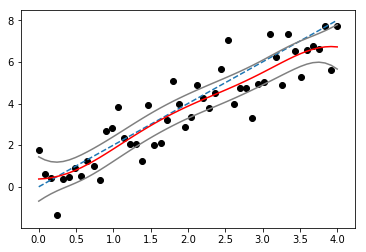

In [71]:
plt.figure()
plt.plot(x, y, '--')
plt.scatter(x, y_obs, color='black')
plt.plot(x, ystar, '-r')
plt.plot(x, y_hi, color='grey')
plt.plot(x, y_lo, color='grey')
plt.show()

In [72]:
samples = gp_obj.rvs(size=100)
int_samples = np.trapz(samples, x, axis=1)
print(int_samples.mean(), int_samples.var())

14.750677210662039 0.28129291981910626


In [73]:
# Now what happens if we also observe/know that the intergral of the data is 16
# /int_0^4 2x dx = 16

l_mu = 16
K = gp_obj.post_cov
L_k = np.trapz(gp_obj.post_cov, x, axis=1)
# L_2 = 3.76
mu_fl = L_k/L_2*l_mu
K_fl = K - np.outer(L_k,L_k.T)/L_2

gp_obj2 = gp.gaussian_process(x, x, y_obs, scale, cov)

gp_obj2.post_mean = mu_fl
gp_obj2.post_cov = K_fl

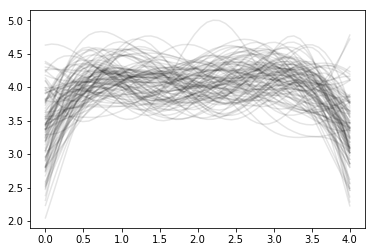

[16.         16.         16.00000001 16.         15.99999998 16.
 16.         16.         15.99999999 16.00000001]


In [77]:
plt.figure()
plt.plot(x, gp_obj2.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

print(np.trapz(gp_obj2.rvs(size=10),x, axis=1))

In [252]:
# Now let's try a df/dx|x=0 = c

x2 = np.linspace(0, 4, num=10)
y2 = 2*x2
y_obs2 = y2 + stats.norm.rvs(scale=scale, size=len(x2))

cov2 = gp.covariance_functions(1, 20)
gp_obj3 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)
ystar2, var2 = gp_obj3.regression()

l_mu2 = 2
K2 = gp_obj3.post_cov
L_k2 = (gp_obj3.post_cov[1] - gp_obj3.post_cov[0])/(x2[1]-x2[0])
L_22 = (L_k2[1] - L_k2[0])/(x2[1]-x2[0])

mu2_fl = L_k2/L_22*l_mu2
K2_fl = K2 - np.outer(L_k2,L_k2.T)/(L_22)

gp_obj4 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)

gp_obj4.post_mean = mu2_fl
gp_obj4.post_cov = K2_fl

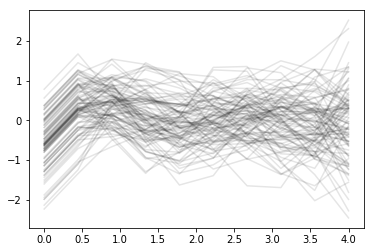

1.999999973190063


In [253]:
plt.figure()
plt.plot(x2, gp_obj4.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample = gp_obj4.rvs()

print((sample[1]-sample[0])/(x2[1]-x2[0]))

In [254]:
cov3 = gp.covariance_functions(1, 20)
gp_obj5 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)
ystar3, var3 = gp_obj5.regression()

K3 = gp_obj5.post_cov
L_k3 = np.gradient(K3, x2, axis=0)[3]

L_23 = np.gradient(L_k3, x2)[3]

l_mu3 = 2
mu3_fl = L_k3/L_23*l_mu3
K3_fl = K3 - np.outer(L_k3,L_k3.T)/(L_23)

gp_obj6 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)

gp_obj6.post_mean = mu3_fl
gp_obj6.post_cov = K3_fl

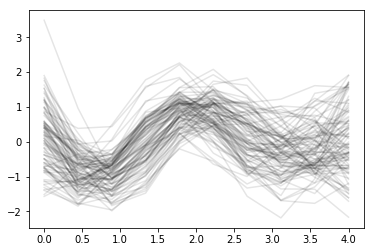

[-0.7063226  -0.53710269  0.98844813  2.          0.15192437 -1.63412121
 -1.01730257  0.55962657  1.20024419  1.16350031]


In [255]:
plt.figure()
plt.plot(x2, gp_obj6.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample2 = gp_obj6.rvs()

print(np.gradient(sample2, x2))

In [ ]:
# Now want to try d^2f/dx^2|x=0 = 0

In [200]:
x4 = np.linspace(0, 4, num=10)
y4 = 2*x4
y_obs4 = y4 + stats.norm.rvs(scale=scale, size=len(x4))

cov4 = gp.covariance_functions(1, 20)
gp_obj6 = gp.gaussian_process(x4, x4, y_obs4, scale, cov4)
ystar4, var4 = gp_obj6.regression()

K4 = gp_obj6.post_cov
L_k4 = np.gradient(np.gradient(K4, x4, axis=0), x4, axis=0)[0]

L_24 = np.gradient(np.gradient(L_k4, x4), x4)[0]

l_mu4 = 0
mu4_fl = L_k4/L_24*l_mu4
K4_fl = K4 - np.outer(L_k4,L_k4.T)/(L_24)

gp_obj7 = gp.gaussian_process(x4, x4, y_obs4, scale, cov4)

gp_obj7.post_mean = mu4_fl
gp_obj7.post_cov = K4_fl

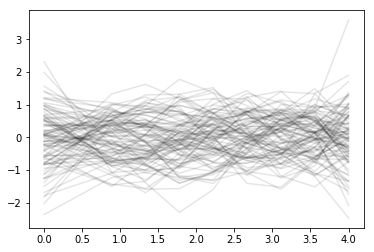

-2.3699426421330827e-08


In [203]:
plt.figure()
plt.plot(x4, gp_obj7.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample3 = gp_obj7.rvs()

print(np.gradient(np.gradient(sample3, x4), x4)[0])

In [239]:
# Now want to try d^2f/dx^2 = 0 for all x

x5 = np.linspace(0, 4, num=20)
y5 = 2*x5
y_obs5 = y5 + stats.norm.rvs(scale=scale, size=len(x5))

cov5 = gp.covariance_functions(1, 20)
gp_obj8 = gp.gaussian_process(x5, x5, y_obs5, scale, cov5)
ystar5, var5 = gp_obj8.regression()

K5 = gp_obj8.post_cov
L_k5 = np.gradient(np.gradient(K5, x5, axis=0), x5, axis=0)

L_25 = np.gradient(np.gradient(L_k5, x5, axis=1), x5, axis=1)

l_mu5 = np.zeros(len(x5))

mu5_fl = L_k5 @ np.linalg.inv(L_25) @ l_mu5 # questionable

K5_fl = K5 - np.linalg.inv(L_25) @ (L_k5 @ L_k5.T) # also questionable

gp_obj8 = gp.gaussian_process(x5, x5, y_obs5, scale, cov5)

gp_obj8.post_mean = mu5_fl
gp_obj8.post_cov = K5_fl

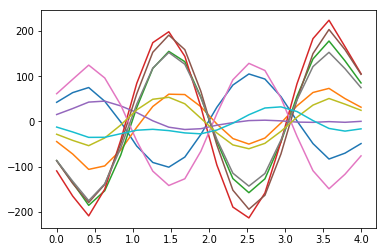

[ -111.08103661  -746.66498793 -1668.55652116 -1441.16927551
  -419.56552813   605.90885533  1442.18691539  1750.11792494
  1386.47154009   482.5528986   -601.23664127 -1451.09022818
 -1738.40218506 -1348.35725274  -468.72928843   527.66869462
  1467.88262394  1598.55819628   654.45612378    42.88339087]


In [240]:
plt.figure()
plt.plot(x5, gp_obj8.rvs(size=10).T, '-', alpha=1)
plt.show()

sample4 = gp_obj8.rvs()

print(np.gradient(np.gradient(sample4, x5), x5))

In [241]:
# The above didn't work. Let's try two adjacent points where d^2f/dx^2 = 0